In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [5]:
#import api_key
from config import api_key

In [6]:
#from citipy import citipy
from citipy import citipy
temp = 'imperial'
url='http://api.openweathermap.org/data/2.5/weather?'

In [7]:
output_data ='Output/weather.csv'

In [8]:
#one call to get the variable names for the for loop
#city = 'albany'
query_url = f'{url}appid={api_key}&units={temp}&q='
#response=requests.get(querl_url).json()
#response

In [9]:
#range of lat and long
lat = (-90,90)
long = (-180,180)

In [10]:
lat_longs = []
cities = []

lats = np.random.uniform(lat[0],lat[1],size=1500)
longs = np.random.uniform(long[0],long[1],size=1500)
lat_longs = zip(lats, longs)

for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

632

In [11]:
cities

['clyde river',
 'manta',
 'saskylakh',
 'phenix city',
 'bang saphan',
 'saint george',
 'puerto ayora',
 'qaanaaq',
 'angra',
 'adrar',
 'mataura',
 'bandar-e anzali',
 'sokyryany',
 'bluff',
 'erechim',
 'vaini',
 'rikitea',
 'lebu',
 'sao joao da barra',
 'atuona',
 'punta arenas',
 'dabakala',
 'georgetown',
 'puerto escondido',
 'jamestown',
 'illoqqortoormiut',
 'boca do acre',
 'cape town',
 'taolanaro',
 'barrow',
 'vernon',
 'loa janan',
 'busselton',
 'strezhevoy',
 'hermanus',
 'umzimvubu',
 'utiroa',
 'mayumba',
 'codrington',
 'oksfjord',
 'longyearbyen',
 'dikson',
 'kapaa',
 'yellowknife',
 'ushuaia',
 'viedma',
 'zonguldak',
 'mangrol',
 'mehamn',
 'esperance',
 'oussouye',
 'butaritari',
 'monrovia',
 'hobart',
 'albany',
 'tiarei',
 'lorengau',
 'saldanha',
 'saint-philippe',
 'new norfolk',
 'kibondo',
 'juba',
 'bilibino',
 'bandarbeyla',
 'mar del plata',
 'los llanos de aridane',
 'poum',
 'bathsheba',
 'rocha',
 'cleveland',
 'la macarena',
 'ponta do sol',
 'os

In [12]:
#may need to add this time.sleep(50) inorder to not get blocked by weather api
cities_two = []
cloudiness = []
dates = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
country = []

#count quantities to make sure group not over 5
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url+city).json()
        cloudiness.append(response['clouds']['all'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        if count_one >48:
            count_one =1
            set_one+=1
            cities_two.append(city)
        else:
            count_one +=1
            cities_two.append(city)
        print(f'{count_one} of {set_one}|{city}')
    except:
        print('Not found')


1 of 1|clyde river
2 of 1|manta
3 of 1|saskylakh
4 of 1|phenix city
5 of 1|bang saphan
6 of 1|saint george
7 of 1|puerto ayora
8 of 1|qaanaaq
Not found
9 of 1|adrar
10 of 1|mataura
11 of 1|bandar-e anzali
12 of 1|sokyryany
13 of 1|bluff
14 of 1|erechim
15 of 1|vaini
16 of 1|rikitea
17 of 1|lebu
18 of 1|sao joao da barra
19 of 1|atuona
20 of 1|punta arenas
21 of 1|dabakala
22 of 1|georgetown
23 of 1|puerto escondido
24 of 1|jamestown
Not found
25 of 1|boca do acre
26 of 1|cape town
Not found
27 of 1|barrow
28 of 1|vernon
29 of 1|loa janan
30 of 1|busselton
31 of 1|strezhevoy
32 of 1|hermanus
Not found
Not found
33 of 1|mayumba
34 of 1|codrington
35 of 1|oksfjord
36 of 1|longyearbyen
37 of 1|dikson
38 of 1|kapaa
39 of 1|yellowknife
40 of 1|ushuaia
41 of 1|viedma
42 of 1|zonguldak
43 of 1|mangrol
44 of 1|mehamn
45 of 1|esperance
46 of 1|oussouye
47 of 1|butaritari
48 of 1|monrovia
49 of 1|hobart
1 of 2|albany
2 of 2|tiarei
3 of 2|lorengau
4 of 2|saldanha
5 of 2|saint-philippe
6 of 2|new n

14 of 10|walvis bay
15 of 10|belaya gora
16 of 10|matay
17 of 10|troitskoye
18 of 10|forbes
19 of 10|elizabeth city
20 of 10|san pascual
Not found
21 of 10|picton
22 of 10|wukari
23 of 10|barabai
24 of 10|hofn
25 of 10|ochakiv
26 of 10|batangafo
27 of 10|takoradi
28 of 10|green river
29 of 10|jonkoping
30 of 10|kautokeino
31 of 10|sechura
32 of 10|chastyye
Not found
33 of 10|yinchuan
34 of 10|dubti
35 of 10|bima
36 of 10|chernyshevskiy
37 of 10|bocanda
38 of 10|sandpoint
39 of 10|liverpool
40 of 10|ixtapa
41 of 10|zambezi
42 of 10|kampene
43 of 10|gorom-gorom
44 of 10|santona
45 of 10|custodia
46 of 10|mattru
47 of 10|duku
48 of 10|whitehorse
49 of 10|novikovo
1 of 11|tigil
2 of 11|tosham
Not found
3 of 11|padang
4 of 11|tecoanapa
Not found
5 of 11|pontian kecil
6 of 11|vohibinany
Not found
7 of 11|san andres
8 of 11|aykhal
Not found
9 of 11|ketchikan
Not found
10 of 11|jalalpur pirwala
11 of 11|kalispell
12 of 11|flin flon
13 of 11|dunedin
14 of 11|killybegs
15 of 11|aksu
16 of 11|rio

In [13]:
#datacheck
len(cities_two)

580

In [14]:
#datacheck
len(cloudiness)

580

In [15]:
#datacheck
len(dates)

580

In [16]:
#create dictionary and then pd.dataframe
weather_dic={'City':cities_two,'Lat':lats,'Lng':lngs,'Max Temp':max_temps,'Humidity':humidity,
            'Cloudiness':cloudiness,'Wind Speeds':wind_speeds,'Country':country,'Date':dates}
weather =pd.DataFrame(weather_dic)
weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speeds,Country,Date
0,clyde river,70.47,-68.59,15.80,85,75,16.11,CA,1604081632
1,manta,-0.95,-80.73,78.80,74,40,12.75,EC,1604081632
2,saskylakh,71.92,114.08,-2.06,85,31,6.08,RU,1604081632
3,phenix city,32.47,-85.00,64.00,48,1,12.75,US,1604081632
4,bang saphan,11.21,99.51,75.29,90,95,1.59,TH,1604081632


In [18]:
weather.to_csv(output_data)

In [19]:
#data check to make sure all date for each city was added and some descriptive stats
weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speeds,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,20.458379,15.649448,58.824207,71.474138,55.518966,8.084172,1.604082e+09
std,33.658564,90.496611,23.163393,22.174477,37.331517,5.929371,6.069237e+01
min,-54.800000,-175.200000,-11.740000,1.000000,0.000000,0.430000,1.604081e+09
25%,-6.487500,-65.190000,44.535000,59.000000,20.000000,3.505000,1.604082e+09
50%,22.860000,18.350000,63.000000,78.000000,67.000000,6.520000,1.604082e+09
75%,49.692500,99.677500,77.957500,89.000000,90.000000,11.010000,1.604082e+09
max,78.220000,179.320000,97.340000,100.000000,100.000000,34.450000,1.604082e+09


In [17]:
#not cities with humidity over 100

weather.loc[weather['Humidity']>100]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speeds,Country,Date


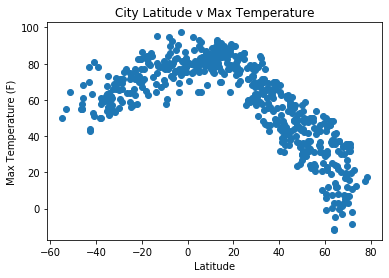

In [20]:
#scatter plot latitude vs temperatur plot
plt.scatter(weather['Lat'], weather['Max Temp'])
plt.title('City Latitude v Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

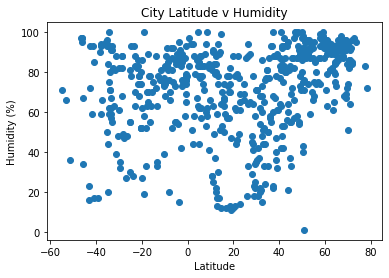

In [21]:
#scatter latitude vs humidity plot
plt.scatter(weather['Lat'], weather['Humidity'])
plt.title('City Latitude v Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

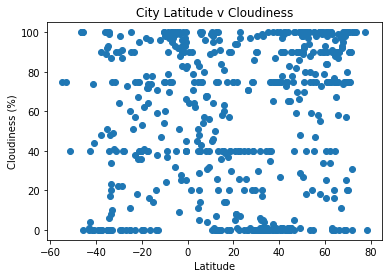

In [22]:
#scatter latitude vs. cloudiness plot
plt.scatter(weather['Lat'],weather['Cloudiness'])
plt.title('City Latitude v Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

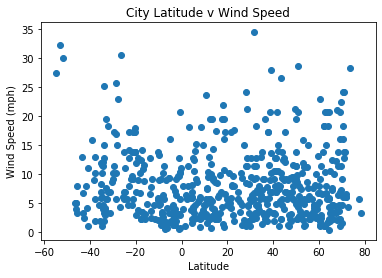

In [23]:
#scatter latitude vs. wind speed plot
plt.scatter(weather['Lat'],weather['Wind Speeds'])
plt.title('City Latitude v Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

In [24]:
weather.dtypes

City            object
Lat            float64
Lng            float64
Max Temp       float64
Humidity         int64
Cloudiness       int64
Wind Speeds    float64
Country         object
Date             int64
dtype: object

In [69]:
north = weather.loc[(weather['Lat'].astype(float)>=0.0),:]
south = weather.loc[(weather['Lat'].astype(float)<0.0),:]

In [70]:
north.count()


City           401
Lat            401
Lng            401
Max Temp       401
Humidity       401
Cloudiness     401
Wind Speeds    401
Country        401
Date           401
dtype: int64

In [71]:
south.count()

City           179
Lat            179
Lng            179
Max Temp       179
Humidity       179
Cloudiness     179
Wind Speeds    179
Country        179
Date           179
dtype: int64

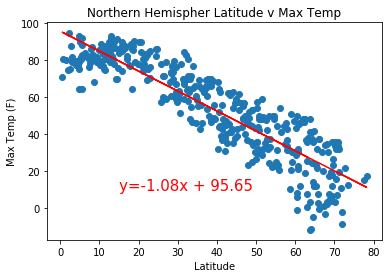

In [72]:
#linear regression Northern Hemisphere -Max temp vs Latitude
x_values = north['Lat']
y_values = north['Max Temp']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
#stay
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Northern Hemispher Latitude v Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

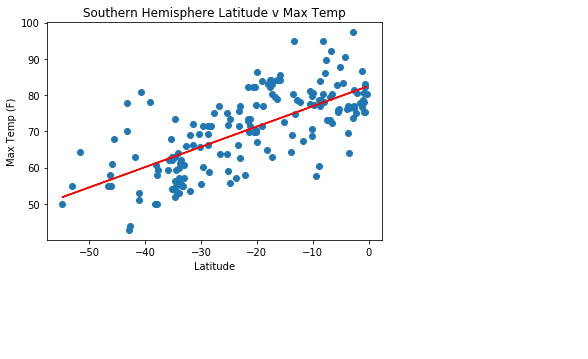

In [73]:
#linear regression southern hemisphere -max temp vs latitude
x_values = south['Lat']
y_values = south['Max Temp']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Southern Hemisphere Latitude v Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

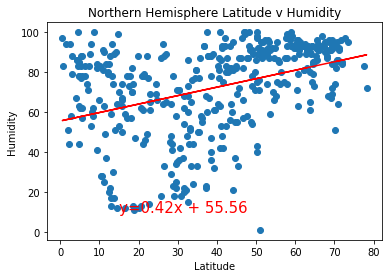

In [74]:
#linear regression northern hemisphere latitude v humidity
x_values = north['Lat']
y_values = north['Humidity']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Northern Hemisphere Latitude v Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [ ]:
#linear regression southern hemisphere latitude v humidity
x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Average Tumer Volume v Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
#linear regression northern hemisphere latitude v cloudiness
x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Average Tumer Volume v Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
#linear regression southern hemisphere latitude v cloudiness
x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Average Tumer Volume v Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
#linear regression northern hemisphere latitude v wind speed
x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Average Tumer Volume v Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
#linear regression southern hemisphere latitude v wind speed
y_values = avg_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Average Tumer Volume v Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()